# this code is analysis of experiment using code built with positive control data
[I used simulation data for two systems. In both the Smad pathway is simulated identically, with random noise in parameters and protein expression. The differene in the two systems is that in system 1, [gene = f(Smad3/4)], target gene expression depends directly on nuclear Smad3/Smad4, and in system 2, [gene = f(Smad3/4 , X)] target gene expression depends on nuclear Smad3/Smad4 and a randomly varying other factor, X (which in this case is a factor that affects how strongly Smad3/4 induces gene expression.]

From the simulated data, I use full trajectories for the level nuclear Smad3--that is the concentration of all species of Smad3 in the nucleus, such as would be observed in a microscope. (Note, I am not using trajectories for Smad3/Smad4 complex, which is the actual molecular complex on which gene production depends. I do not use these trajectories because they are not measurable in cells). Second, I use full trajectories of target gene production. For gene expression I analyze either A) a gene whose production depends directly on Smad3/Smad4 binding, or B) a gene whose production depends on a small network motif (3-nodes total, I-FFL1 specifically) that causes production of gene to be proportional to the fold-change in Smad3/Smad4 complex.

For experimental""" analysis, I take trajectories of nuclear NG-Smad3, which were measured in single cells from experiments and I take trajectories of total nuclear Snail:mCherry (or median, see next experiment). I first run diffusion maps on the NG-Smad3 trajectories to obtain a good DMAP for NG-Smad3. Then I obtain a DMAP for Snail using the same method. Then I use Gaussian Process Regression to assess whether Snail dynamics (i.e. Snail DMAP) can be predicted using Smad3 dynamics (i.e. Snail DMAP). 

In order to obtain a good diffusion map, I prepare (process?) the original data in the following way.
1. First, I take raw data as is. This is matrix1. (Matrix1 is M cells X N timepoints)
2. Then I take the raw data and compute the derivative of each trajectory. This is matrix 2. 
3. Then I take the raw data and compute the integral of each trajectory. This is matrix 3. 
4. Then I combine matrices 1, 2 and 3 into one new matrix, MatrixCAT (MatrixCAT is M cells X 3*N timepoints)
5. Then I transform this data set (in a way the preserves the topology of the data set) by normalizing all trajectories at each time point using the following:
    MT = MatrixCAT[t,:] (t=1)
    [MT is an 1 x M array, where M is the number of cells]
    MTn = MT-min(MT)/(max(MT)-min(MT)
    MTns = sqrt(MTn)
    MatrixCATztos[t,:] = MTns
    [I do this for all timepoints]
6. This transformation preserves topology, and it ensures that the difussion distances are similar for each dimension, which is important for finding a good difussion kernel for the diffusion map algoritm. 
7. By including raw data, first derivative of data, and integral of data were are enableing the algorithm to find a difussion Map that uncovers the dynamical features of the data set. 





# below this is the one value you must change if you change how this code runs

In [2]:
#epscale paramters
#num_evecs
#peakfindercutoff

#epsilon search parameters
num_eps = 50
eL = 1.2
eH = 4

evecs_cut = True
num_evecs=30

sampiter = 20 #number of times to iterate through Local linear regression
subsampfactor = 8 #scale at which to subsample data for LLR # subsampsize = np.ceil(datasize/subsampfactor)
subsampmax = 500 # never run LLR for more than 500 data pts; it will fail

reducedimval = 50
promval = 0.05 #defines prominence of peaks at which to threshold

In [3]:
# specid = 'EXP_S3conc_SNAILconc_gpy_LLRpeakfinder-AGNOSTIC-ztosqrtResample'
specid = 'agnostic-AGI-zto_numeps'+str(num_eps)+'-'+str(eL)+'-'+str(eH)+'_rdimval'+str(reducedimval)+'_n-evecs'+str(num_evecs)+'cut-'+str(evecs_cut)+'_promval-'+str(promval)+'_SI-'+str(sampiter)+'_subsampF'+str(subsampfactor)+'_sampmax'+str(subsampmax)  
print(specid)

agnostic-AGI-zto_numeps50-1.2-4_rdimval50_n-evecs30cut-True_promval-0.05_SI-20_subsampF8_sampmax500


/Users/frick/Dparams/DParamsFinal_v5
16  runs to perform
csvsub1 exp3-SMAD-median
ev_in =  [1, 3, 6]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


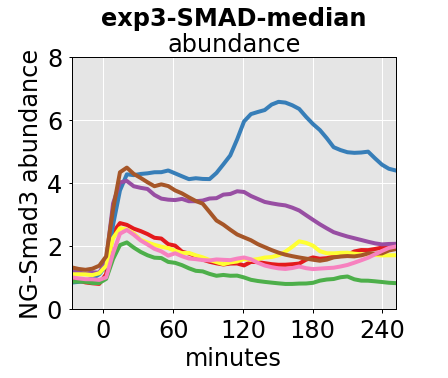

csvsub1 exp3-SMAD-total
ev_in =  [1, 4, 10]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


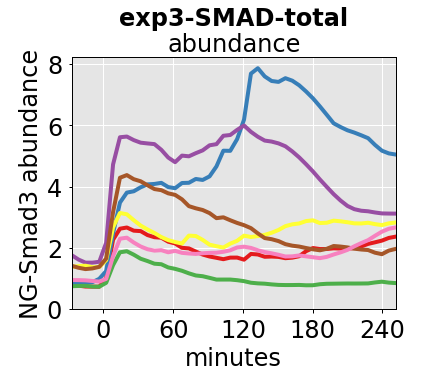

csvsub1 exp4-SMAD-median
ev_in =  [1, 3, 7]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


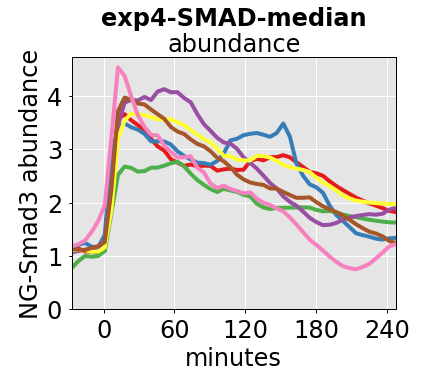

csvsub1 exp4-SMAD-total
ev_in =  [1, 6, 11]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


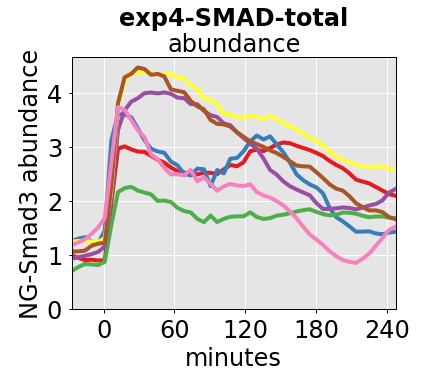

csvsub1 exp3-GENE-median
ev_in =  [1, 3]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


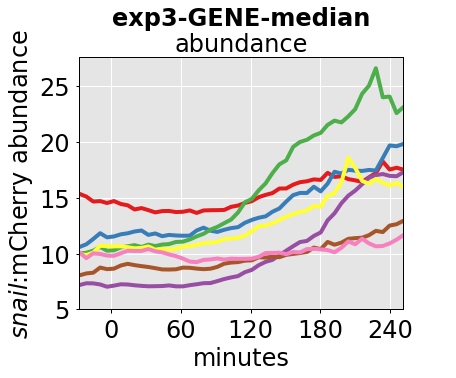

csvsub1 exp3-GENE-total
ev_in =  [1, 5]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


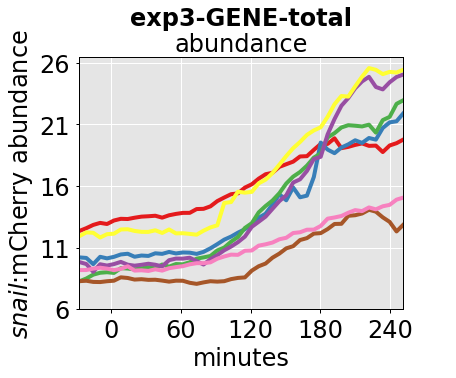

csvsub1 exp4-GENE-median
ev_in =  [1, 4]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


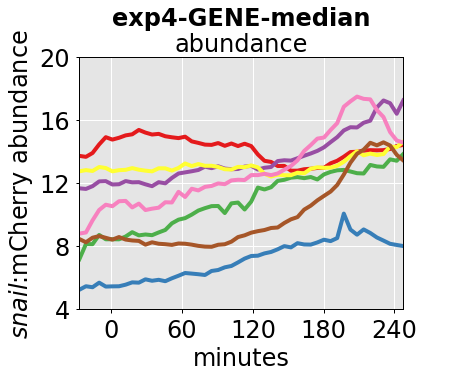

csvsub1 exp4-GENE-total
ev_in =  [1, 4]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


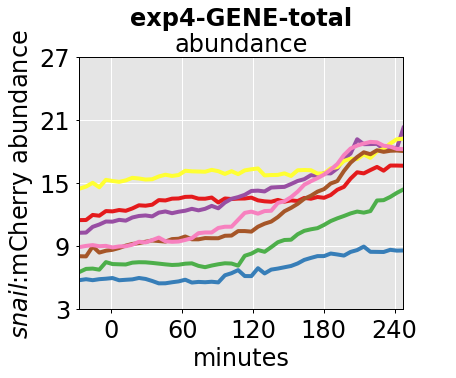

csvsub1 exp-SMAD-rsmad
ev_in =  [1, 4, 9]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


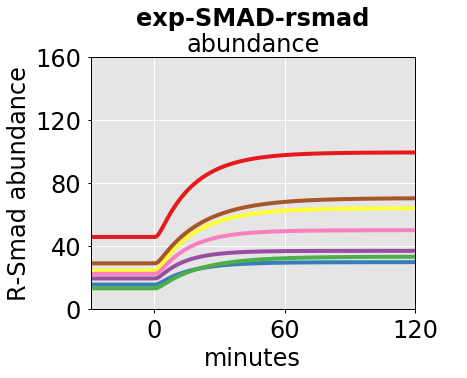

csvsub1 exp-SMAD-complex
ev_in =  [1, 3]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


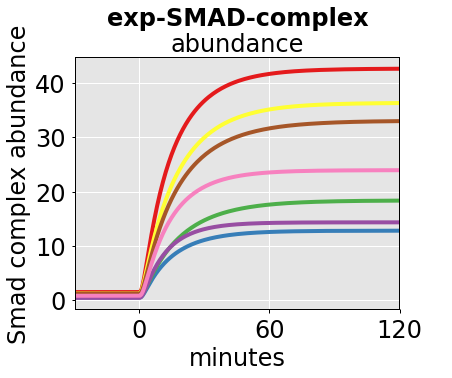

csvsub1 expSYST1_PC-GENE-iffl
ev_in =  [1, 3, 8]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


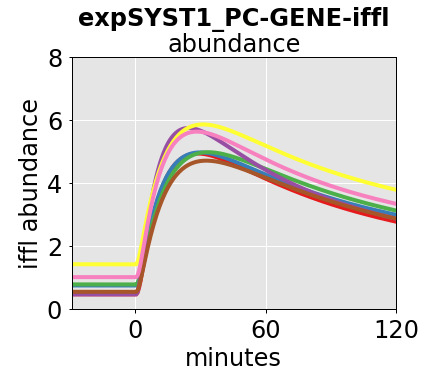

csvsub1 expSYST1_PC-GENE-caga
ev_in =  [1, 3]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


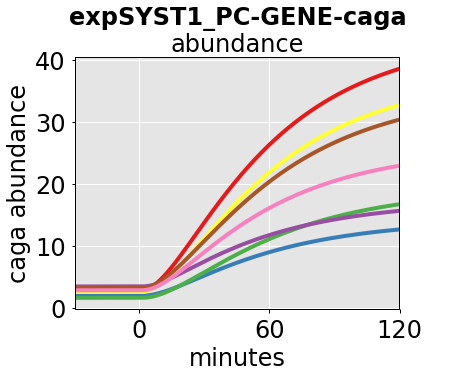

csvsub1 expSYST2_PC-GENE-iffl
ev_in =  [1, 4]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


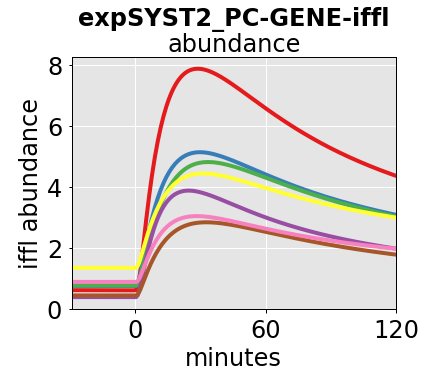

csvsub1 expSYST2_PC-GENE-caga
ev_in =  [1, 5]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


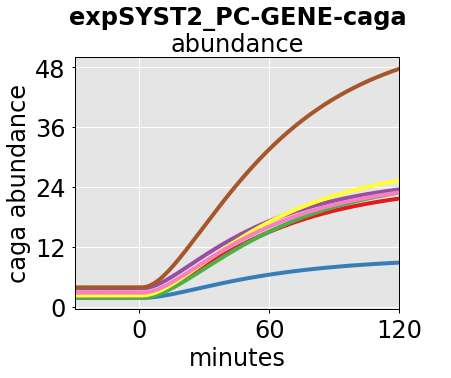

csvsub1 expSYST3_PC-GENE-iffl
ev_in =  [1, 3, 8]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


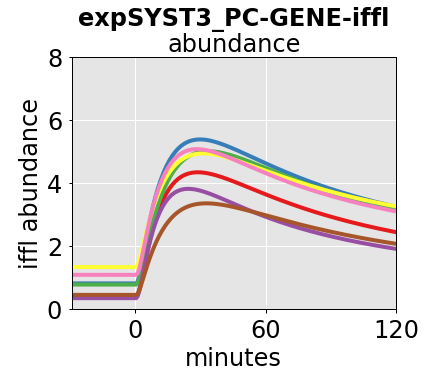

csvsub1 expSYST3_PC-GENE-caga
ev_in =  [1, 4]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1 1
5.5 4.1
[0.         0.14166667 0.28333333 0.425      0.56666667 0.70833333
 0.85      ]
0


 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:213: RuntimeWarning:invalid value encountered in log10
 /Users/frick/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:325: RuntimeWarning:divide by zero encountered in double_scalars


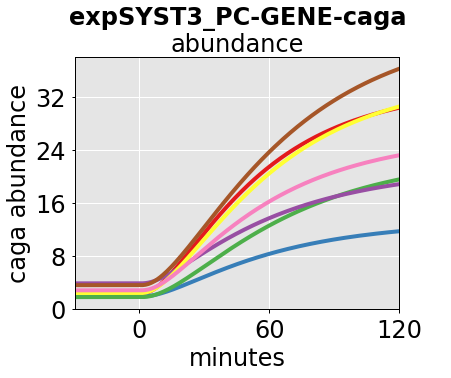

In [109]:
from pathlib import Path
cwd = Path().resolve()
print(cwd)
import sys
sys.path.insert(0, cwd) 


import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as manimation
import numpy as np

import matplotlib.tri as mtri

from scipy.integrate import odeint
from scipy.integrate import complex_ode

import scipy.spatial.distance
import scipy
import scipy.interpolate
import scipy.signal
import itertools 
import re

from dmap_sp_chrisNEW import *
import os

import dmap_sp_chrisNEW
import importlib
importlib.reload(dmap_sp_chrisNEW)
    
from accessory import *


specidpath = specid.replace(".", "dot")

repo = str(cwd) +'/'

# ########################  IMPORT   ############################
import dill as pickle;
#     from pathlib import Path



session_savepath =  specidpath + '/'
session_path = repo + session_savepath

#     print(not (os.path.isdir(session_path)))
if not (os.path.isdir(session_path)):
    print('making' + session_path + '...')
    error('incoddrect directory')




filenames = list()
for file in os.listdir(session_path):
    if file.endswith("pickle"):
        if bool(re.search('SMAD-rsmad',file)):
            filenames = filenames + list([file])
#             print(os.path.join(session_path,file))
#             filenames = filenames + list(str((os.path.join(session_path,file))))




a = ['exp3','exp4']
b = ['SMAD-median','SMAD-total']
c = ['GENE-median','GENE-total']
expSMAD = list(itertools.product(a,b))
expSNAIL = list(itertools.product(a,c))

a1 = ['exp']
b = ['SMAD-rsmad','SMAD-complex']
simSMAD = list(itertools.product(a1,b))

a2 = ['expSYST1_PC','expSYST2_PC','expSYST3_PC']
c = ['GENE-iffl','GENE-caga']
simGENE = list(itertools.product(a2,c))



dall = expSMAD + expSNAIL + simSMAD + simGENE
print(len(dall), ' runs to perform')
for dd in dall:

############ this block of loads best manifold ########################  


#     checkstr1 = 'exp'
#     checkstr2 = 'SMAD-rsmad'
    checkstr1 = dd[0]
    checkstr2 = dd[1]
    filenames = list()
    for file in os.listdir(session_path):
        if file.endswith("pickle"):
            if (bool(re.search(checkstr1,file)) & (bool(re.search(checkstr2,file)))):
                filenames = filenames + list([file])   

  

    file = filenames[0]
    pickle.load_session(session_path + file)


        
    if bool(re.search(checkstr2,'GENE')):
        epsfact = epsfactout
    else:
        epsfact = epsfactin
        
        
    bestdmapcsv_savepath1 = str(cwd) + '/' + specidpath + '/' 
    if not os.path.exists(bestdmapcsv_savepath1):
        error('no dir')   
    bestdmapcsv_savepath2 = bestdmapcsv_savepath1 + 'csvfiles'+'/'
    if not os.path.exists(bestdmapcsv_savepath2):
        error('no dir')
        
        

    # #load the CSV files    
    csvsub1 = checkstr1 + '-' + checkstr2
    savepath  = bestdmapcsv_savepath2 + csvsub1  + '-'

    evecs_in_csv = np.genfromtxt(savepath+"evecs_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    evals_in_csv = np.genfromtxt(savepath+"evals_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    eps_in_csv = np.genfromtxt(savepath+"eps_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")
    ev_in_csv = np.genfromtxt(savepath+"ev_in.csv", missing_values="NaN", filling_values=1, skip_header=0, delimiter=",")

    evecs_in = evecs_in_csv
    evals_in = evals_in_csv
    eps_in = eps_in_csv
    ev_in = [int(x) for x in ev_in_csv]
    print('csvsub1',csvsub1)
    print('ev_in = ', ev_in)
    

    
    def catchImportantWords(ss20):
        m = re.findall(r'SMAD|GENE|doubt', ss20, re.IGNORECASE)
        ss21 = m[0]

        if bool(re.search('GENE',ss21)):
            m = re.findall(r'caga|iffl|median|total|doubt', ss20, re.IGNORECASE)
            ss22 = str(m[0])
            ss2 = ss22
            newstrsub = ss2
            if bool(re.findall(r'median|total', ss22, re.IGNORECASE)):
                ss2 = ss22+' $\itsnail$:mCherry' 
                newstrsub = '$\itsnail$:mCherry' 
            if bool(re.findall(r'SYST1|doubt', ss20, re.IGNORECASE)):
                ss2 = ss22 + ', f(Smad complex)' 
                newstrsub = ss22
            elif bool(re.findall(r'SYST2|doubt', ss20, re.IGNORECASE)):
                ss2 = ss22 + ', f(Smad complex, X)' 
                newstrsub = ss22
            elif bool(re.findall(r'SYST3|doubt', ss20, re.IGNORECASE)):
                ss2 = ss22 + ', f(Smad complex, many X)' 
                newstrsub = ss22


        else:
            m = re.findall(r'rsmad|complex|median|total|doubt', ss20, re.IGNORECASE)
            ss22 = str(m[0])
            ss2 = ss22
            newstrsub = 'R-Smad'
            if bool(re.findall(r'median|total', ss22, re.IGNORECASE)):
                newstrsub = 'NG-Smad3'
                ss2 = ss22 +' NG-Smad3' 
            elif bool(re.findall(r'complex|doubt', ss22, re.IGNORECASE)):
                ss2 = 'Smad ' + ss22
                newstrsub = 'Smad complex'

        newstr = ss2
        return newstr,newstrsub


    def uniqueDMAPStoplot(ev_test,numin):
        import itertools
        icl = list(itertools.combinations(ev_test,numin))
        outv = [np.where(~np.in1d(ev_test, x))[0][0] for x in icl]
        plotzys = [list(np.hstack((icl[x],ev_test[outv[x]]))) for x in range(len(icl))]
        return(plotzys)


    
    

    def makeFigureWithDefinedSubplotAxes(axW,axH,gapW,gapH,numX,numY):


        wL = 0.5 #leftval in inches
        wR = 0.5 #rightval in inches
        hB = 0.1 #bottomval in inches
        hT = 0.5 #topval inches

        fW = wL + wR + axW*numX + gapW*(numX-1)
        fH = hB + hT + axH*numY + gapH*(numY-1)

        left = wL/fW
        right = 1- (wR/fW)
        bottom = hB/fH
        top = 1-(hT/fH)
        wspace = gapW/axW
        hspace = gapH/axH


        return fW,fH,left,right,top,bottom,wspace,hspace

    def roundup(x,updown):
        factor = 10**np.floor(np.log10(x))
        if bool(re.search('up',updown)):
            xx =  np.ceil((x / factor)) * factor
        elif bool(re.search('down',updown)):
            xx =  np.floor((x / factor)) * factor
        
        if np.isnan(xx):
            xx=0
        return xx

    def plot_trajectories_colored_by_dparamEXEMP(time_data,ogdin,evecs_in,ev_in,ss10,fsize,wspaceA,hspaceA,cmapstr,fontsize,savepath,dosage_data):
        ss1,ss1sub = catchImportantWords(ss10)
        
        suptitlestr = ss10
        import numpy as np
        import cycler
        import matplotlib as mpl

        
        #plot the Smad trajectories colored by info
        xlabelstr = 'minutes'
        namesj = ['abundance']
        numberOfTransforms = len(namesj);
        cycle = iter(range(len(ev_in)*numberOfTransforms))
          
        
        nt = numberOfTransforms
#         wA = wspaceA
#         fsize[0] = (fsize[0]+(wA*(nt-1)))*nt
        
        levi = 1
#         hA = hspaceA
#         fsize[1] = (fsize[1]+(hA*(levi-1)))*levi
        
        print(nt,levi)
        nt=1
        levi=1
        axW = 2.0
        axH = 1.5
        gapW = 0.5
        gapH = 0.5
        fW,fH,left,right,top,bottom,wspace,hspace = makeFigureWithDefinedSubplotAxes(axW,axH,gapW,gapH,numX=2,numY=2)

        print(fW,fH)
        fsize = (fW,fH)
        fig = plt.figure(figsize=fsize)
    
    

    
        cmap = plt.get_cmap(cmapstr)
        didx = np.where((dosage_data==np.max(dosage_data)))[0]
        xmat = time_data[didx,:]
        ymat = ogdin[didx,:]

        numcells = np.min((7,len(didx)))
        np.random.seed(5)
        xv = np.random.randint(0,ymat.shape[0],numcells)

        ymat = ymat[xv,:]
        xmat = xmat[xv,:]

        n = ymat.shape[0]
        cmap = plt.get_cmap(cmapstr)
        linvec = np.linspace(0, 0.85, n)
        print(linvec)
        
        colormap = cmap(linvec)
        mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', colormap) 
        
        tvec = xmat[1,:]
        b0 = np.where((tvec<0)&(tvec>-30))[0]


        #fold change
        fc = ymat.copy()
        for i in range(ymat.shape[0]):
            fc[i,:] = ymat[i,:]/np.median(ymat[i,b0])

        #difference
        diff = ymat.copy()
        for i in range(ymat.shape[0]):
            diff[i,:] = ymat[i,:]-np.median(ymat[i,b0])

        #gradient of level
        grfc = np.gradient(ymat.copy(),tvec,axis=1)

        for j in range(nt):
            ylabelstr = ss1sub + ' ' + namesj[j]
            print(j)
            if j==0: #level
                ys2 = ymat.copy()
            elif j==1: #fold change
                ys2 = fc.copy()
            elif j==2: #difference
                ys2 = diff.copy()
            elif j==3:
                ys2 = grfc.copy()            
            else:
                ys2 = ymat.copy()
                error('you did something wrong')

            titlestr = namesj[j]
 

            yH = np.max(ys2[:])
            yL = np.min(ys2[:])
            gf = 10
            yS = (yH-yL)/gf
            
            yT = roundup((yH+yS),'up')
            yB = roundup((yL-yS),'down')
            if (np.log10(yT/yB))>1:
                yB=0
                
            numyticks=5
            ygap = np.ceil((yT-yB)/numyticks)
#             yticks = np.linspace(yB,yT,5)
            yticks = np.arange(yB,yB+(ygap*numyticks),ygap)
                
            allticks = np.linspace(-1,1,5)
            xticks = numpy.arange(-1, 5, 1)*60
            xticksm = numpy.arange(-1, 5, 0.5)*60
            cyc = next(cycle)
            fig.add_subplot(levi,numberOfTransforms,cyc+1)
            pp = plt.plot(xmat.T,ys2.T,linewidth=4)    
            ax = plt.gca()
            ax.set_xlabel(xlabelstr,fontsize=fontsize)
            ax.set_xticks(xticks)
            ax.set_yticks(yticks)
#             ax.set_xticks(xticksm, minor=True)
#             ax.set_xlim(-30,300)
            ax.set_ylabel(ylabelstr,fontsize=fontsize)
            for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(fontsize) 
            for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(fontsize) 
            ax.set_xlim(np.min(time_data[:]),np.max(time_data[:]))
            ax.set_title(titlestr,fontsize=fontsize)
#             if j == (numberOfTransforms-1):
#                 t = ax.text(1.1,0.5,'colored by dim=' + str(ii+1),transform=ax.transAxes, horizontalalignment='left',verticalalignment='center',rotation=90, fontsize=fontsize)
#         fig.subplots_adjust(wspace=wspaceA,hspace=hspaceA)
        fig.subplots_adjust(wspace=wspace,hspace=hspace,left=left,right=right,bottom=bottom,top=top)
        savestr = savepath+  ss10 + 'trajectories colored by DMAP dims.png'
        plt.suptitle(t=suptitlestr,x=0.5,y=1.05,fontsize=fontsize*1,fontweight = 'bold')
        fig.add_axes([0,0,1,1]).axis("off")
        plt.savefig(savestr,bbox_inches='tight')
#         
        plt.show()


   
    
   
    #################################################################    
    stylestr = 'FrickNEW3'
    plt.style.use(stylestr)
    cmapstr = 'Set1'
    cmap = plt.get_cmap(cmapstr)

    savepath = str(cwd) + '/' + specidpath + '/trajectories exemplary-'+cmapstr+'-'+stylestr+'/'
    if not os.path.exists(savepath):
        os.mkdir(savepath)
        print('making...', savepath)
        
    sf = 1.5; #scale factor
    fsize=(np.asarray([4,3])/2)*sf
    msize = 50
    wspaceA=0.5
    hspaceA=0.6
    lw=2
    fontsize = 24
    evecs_test = evecs_in.copy()
    ev_test = ev_in.copy()
    ss1 = checkstr1+'-'+checkstr2
    if bool(re.search(r'GENE',ss1)):
        ogdata = ogdout.copy()
    else:
        ogdata = ogdin.copy()
        
        
    udose = np.unique(dosage_data)
    if len(udose)>10:
        dosage_data = np.round(dosage_data,1)
        udose = np.unique(dosage_data)
        print(udose)
    plot_trajectories_colored_by_dparamEXEMP(time_data,ogdata,evecs_test,ev_test,ss1,fsize.copy(),wspaceA,hspaceA,cmapstr,fontsize,savepath,dosage_data)

    

In [77]:
updown='up'
x = 14
factor = 10**np.floor(np.log10(x))
print(factor)
print(x/factor)
if bool(re.search('up',updown)):
    xx =  np.ceil((x/factor))*factor
elif bool(re.search('down',updown)):
    xx =  np.floor((x / factor),0) * factor

print('xx=',xx)

10.0
1.4
xx= 20.0


In [44]:
yT>

eat me


In [103]:
np.log10(20/2)
np.log10(10/2)

0.6989700043360189

# first attempt to use the original DMAPS [1,3] and [1] using GPy

In [ ]:
=

10.0